<a href="https://colab.research.google.com/github/calvinadoho/Projet-ML-TNT/blob/main/Entra%C3%AEnement_et_Evaluation_des_mod%C3%A8les_Nouvelle_base_de_donn%C3%A9es_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import drive

In [ ]:
drive.mount('/gdrive')
os.listdir("/gdrive/MyDrive/RESULTATS TNT")

Mounted at /gdrive


['Data.xlsx',
 'Data_remplies.csv',
 'data_encoded.csv',
 'base_équilibrée.csv',
 'Base_de_donnees_Augmentées.csv',
 'Base_de_données_outliers.csv',
 'Data_standardisé.csv',
 'Data_pca.csv']

In [ ]:
Data=pd.read_csv("/gdrive/MyDrive/RESULTATS TNT/Data_pca.csv")
Data

,Freq,Wspd,Distance,Tx_to_building,Pres,Tilt,Azimuth,Wdir,Rx_power_dBm,E_field
0,1.0,-0.510111,1.483462,-0.367649,0.490355,-1.254961,2.259021,-1.336718,-0.519008,0.269437
1,1.0,-0.510111,1.374461,-0.341997,0.136293,-1.254961,-0.425608,-1.138982,-0.519008,-0.947233
2,1.0,-1.002074,1.483462,-0.339589,-1.279954,-1.254961,-0.459455,0.311079,-0.519008,-0.468415
3,1.0,-0.510111,1.277822,-0.360560,0.667386,-1.254961,2.259021,-1.336718,-0.753858,-0.232930
4,1.0,-0.510111,1.483462,-0.370951,0.667386,-1.254961,-0.411864,-1.336718,-1.709955,-0.014482
...,...,...,...,...,...,...,...,...,...,...
1463,-1.0,1.500625,0.340178,-0.539915,-1.237119,1.334756,-0.934340,-1.336718,-0.094182,0.553576
1464,-1.0,0.617851,0.687979,-0.725959,-0.720314,-0.467806,-0.149552,0.324261,0.842036,1.175402
1465,-1.0,-0.460936,0.309157,-0.312430,-0.999743,0.567454,-0.607952,-1.336718,0.720810,1.175402
1466,-1.0,0.058774,0.077204,-0.335183,-0.844198,0.157878,-1.137509,-1.336718,0.781032,0.547666



**REGRESSION LINEAIRE**




Résultats Régression Linéaire avec 5-fold CV sur 5 sous-échantillons :
   sample_size        R2      RMSE
0          200  0.512754  0.691809
1          400  0.547335  0.668550
2          600  0.557961  0.660708
3          800  0.558187  0.659678
4         1000  0.547122  0.669793
5         1200  0.546870  0.668996
6         1400  0.552895  0.664812


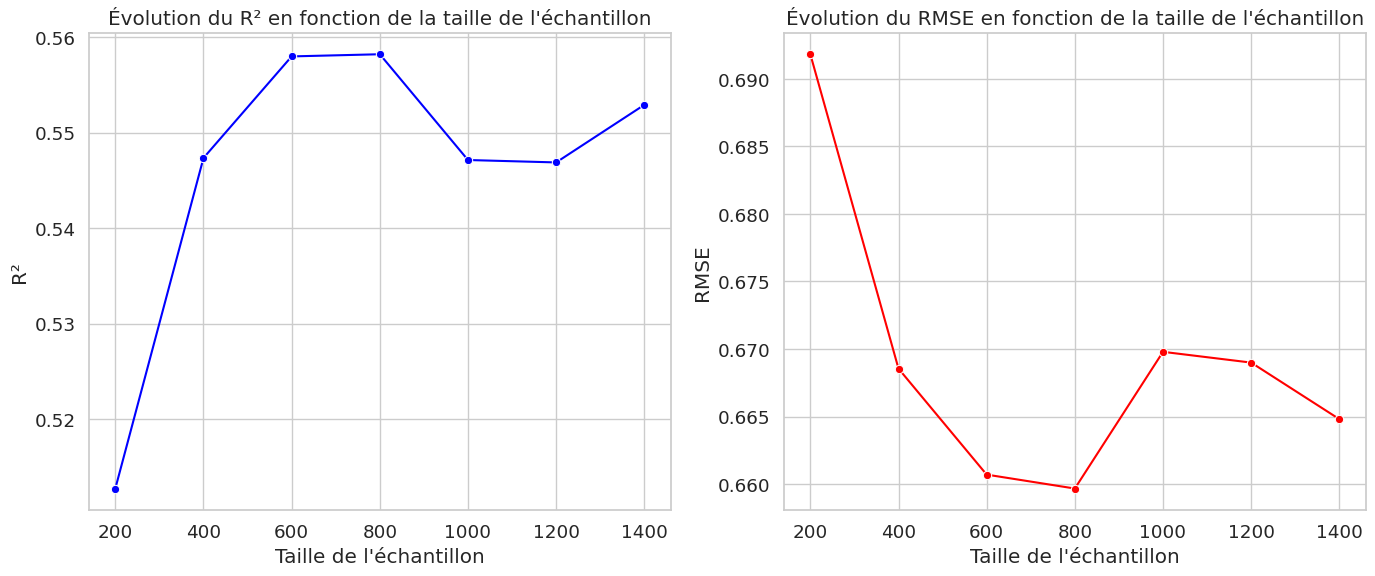

In [ ]:
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Dictionnaire pour enregistrer les résultats
results_lr = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]
n_repeats = 5  # 5 répétitions aléatoires pour chaque taille

# Boucle sur les tailles d’échantillons
for size in sample_sizes:
    r2_scores = []
    rmse_scores = []

    for _ in range(n_repeats):
        # Tirage aléatoire d’un sous-échantillon de la taille spécifiée
        sample_indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[sample_indices]
        y_sample = y.iloc[sample_indices]

        # Validation croisée 5 folds
        kf = KFold(n_splits=5, shuffle=True, random_state=None)

        for train_index, test_index in kf.split(X_sample):
            X_train, X_test = X_sample.iloc[train_index], X_sample.iloc[test_index]
            y_train, y_test = y_sample.iloc[train_index], y_sample.iloc[test_index]

            modelRL = LinearRegression()
            modelRL.fit(X_train, y_train)
            y_pred = modelRL.predict(X_test)

            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            r2_scores.append(r2)
            rmse_scores.append(rmse)

    # Moyenne des résultats pour cette taille d’échantillon
    results_lr['sample_size'].append(size)
    results_lr['R2'].append(np.mean(r2_scores))
    results_lr['RMSE'].append(np.mean(rmse_scores))

# Convertir le dictionnaire en DataFrame avec index
df_results_lr = pd.DataFrame(results_lr)

# Affichage des résultats
print("Résultats Régression Linéaire avec 5-fold CV sur 5 sous-échantillons :")
print(df_results_lr)

# Visualisation
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_lr, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_lr, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()


**XGBOOST**

Résultats XGBoost Regressor avec 5-fold CV sur 5 sous-échantillons (sans écarts-types) :
   sample_size        R2      RMSE
0          200  0.463684  0.704536
1          400  0.442033  0.719440
2          600  0.481815  0.720884
3          800  0.510227  0.702007
4         1000  0.499849  0.699293
5         1200  0.520425  0.688897
6         1400  0.518675  0.691513


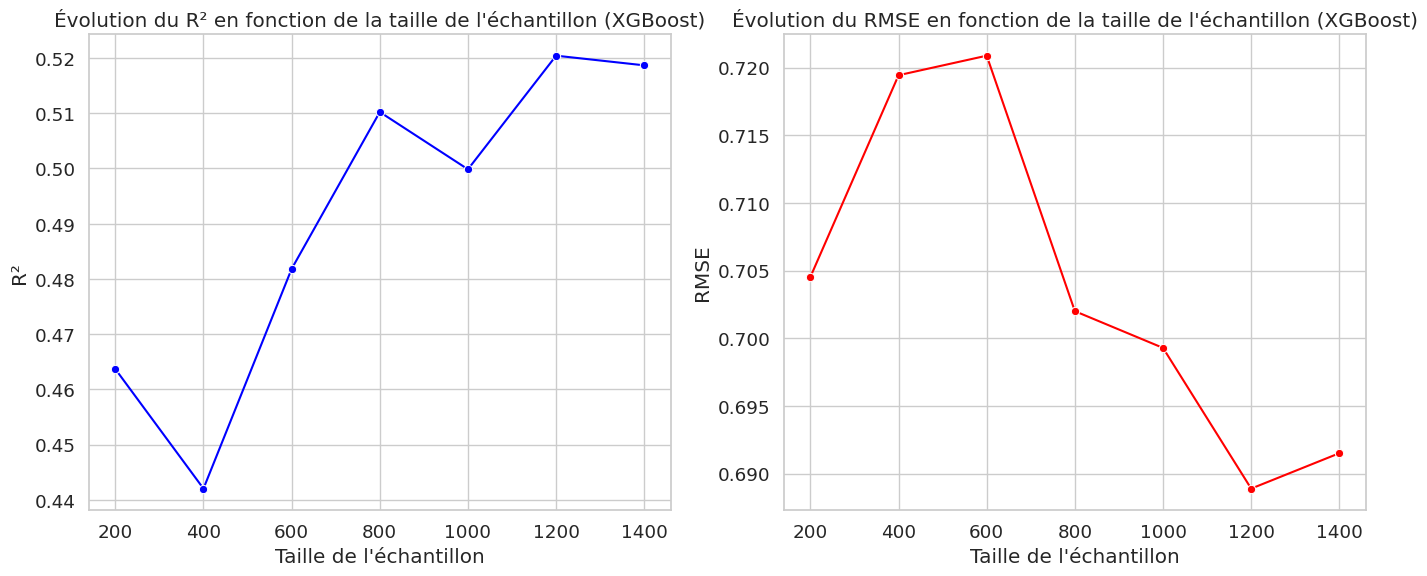

In [ ]:
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Dictionnaire pour enregistrer uniquement les moyennes
results_xgb = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d’échantillon et nombre de répétitions
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]
n_repeats = 5

# Boucle sur les tailles d’échantillons
for size in sample_sizes:
    r2_scores = []
    rmse_scores = []

    for _ in range(n_repeats):
        # Tirage aléatoire d’un sous-échantillon
        sample_indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[sample_indices]
        y_sample = y.iloc[sample_indices]

        # Validation croisée 5 folds
        kf = KFold(n_splits=5, shuffle=True)

        for train_index, test_index in kf.split(X_sample):
            X_train, X_test = X_sample.iloc[train_index], X_sample.iloc[test_index]
            y_train, y_test = y_sample.iloc[train_index], y_sample.iloc[test_index]

            modelXGB = XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0)
            modelXGB.fit(X_train, y_train)
            y_pred = modelXGB.predict(X_test)

            r2_scores.append(r2_score(y_test, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    # Moyenne uniquement
    results_xgb['sample_size'].append(size)
    results_xgb['R2'].append(np.mean(r2_scores))
    results_xgb['RMSE'].append(np.mean(rmse_scores))

# Conversion en DataFrame
df_results_xgb = pd.DataFrame(results_xgb)

# Affichage des résultats
print("Résultats XGBoost Regressor avec 5-fold CV sur 5 sous-échantillons (sans écarts-types) :")
print(df_results_xgb)

# Visualisation
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_xgb, x='sample_size', y='R2', marker='o', color='blue')
plt.title("Évolution du R² en fonction de la taille de l'échantillon (XGBoost)")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("R²")
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_xgb, x='sample_size', y='RMSE', marker='o', color='red')
plt.title("Évolution du RMSE en fonction de la taille de l'échantillon (XGBoost)")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("RMSE")
plt.grid(True)

plt.tight_layout()
plt.show()


**Optimisation des hyperparamètres**

Résultats XGBoost :
   sample_size        R2      RMSE
0          200  0.360520  0.835639
1          400  0.600053  0.602713
2          600  0.577042  0.682658
3          800  0.571984  0.663350
4         1000  0.556231  0.661032
5         1200  0.530910  0.660679
6         1400  0.560685  0.648664


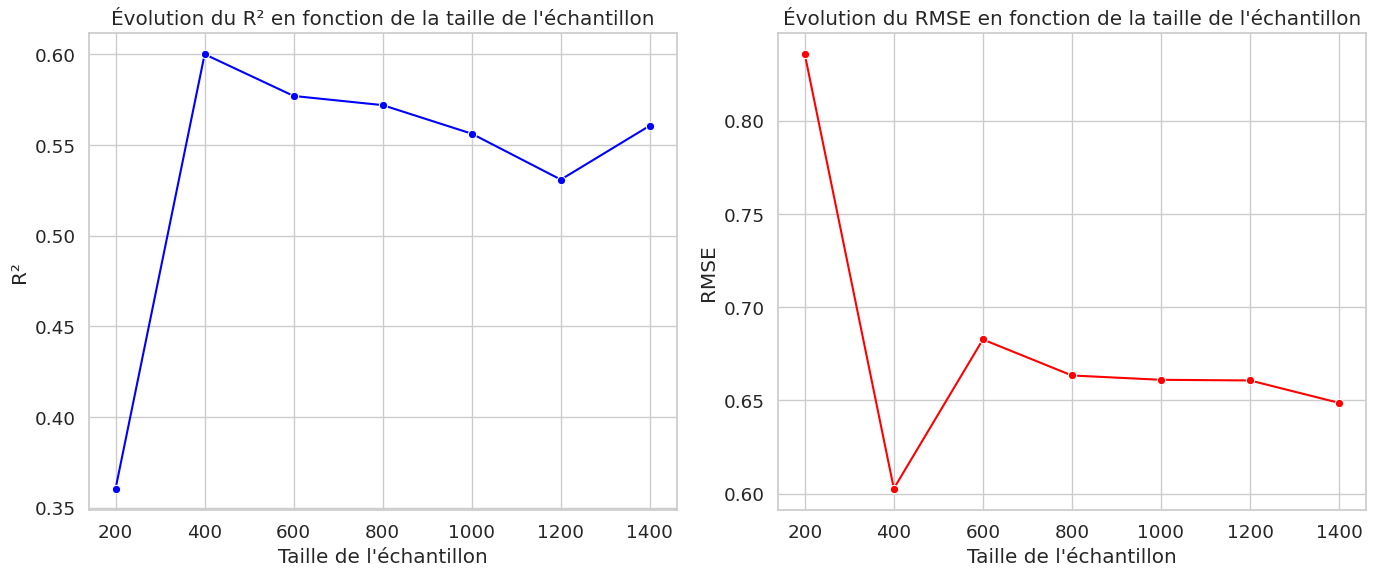

In [ ]:
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

results_xgb = {'sample_size': [], 'R2': [], 'RMSE': []}
param_grid_xgb = {
   'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.9, 1.0]
}

for size in sample_sizes:
    sample_indices = np.random.choice(len(X), size=size, replace=False)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]


    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=42
    )

    grid = GridSearchCV(
        XGBRegressor(random_state=42, verbosity=0),
        param_grid_xgb, cv=5, scoring='r2', n_jobs=-1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results_xgb['sample_size'].append(size)
    results_xgb['R2'].append(r2)
    results_xgb['RMSE'].append(rmse)

df_results_xgb_GS= pd.DataFrame(results_xgb)
print("Résultats XGBoost :")
print(df_results_xgb_GS)


# Visualisation avec seaborn et matplotlib
sns.set(style="whitegrid", font_scale=1.2)

# Création de la figure pour afficher les deux graphiques
plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_xgb_GS, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_xgb_GS, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

**RANDOM FOREST**

Résultats Random Forest Regressor avec 5-fold CV sur 5 sous-échantillons :
   sample_size        R2      RMSE
0          200  0.523109  0.656031
1          400  0.545247  0.668285
2          600  0.531958  0.668352
3          800  0.562281  0.654092
4         1000  0.571268  0.656132
5         1200  0.583301  0.642653
6         1400  0.580448  0.645417


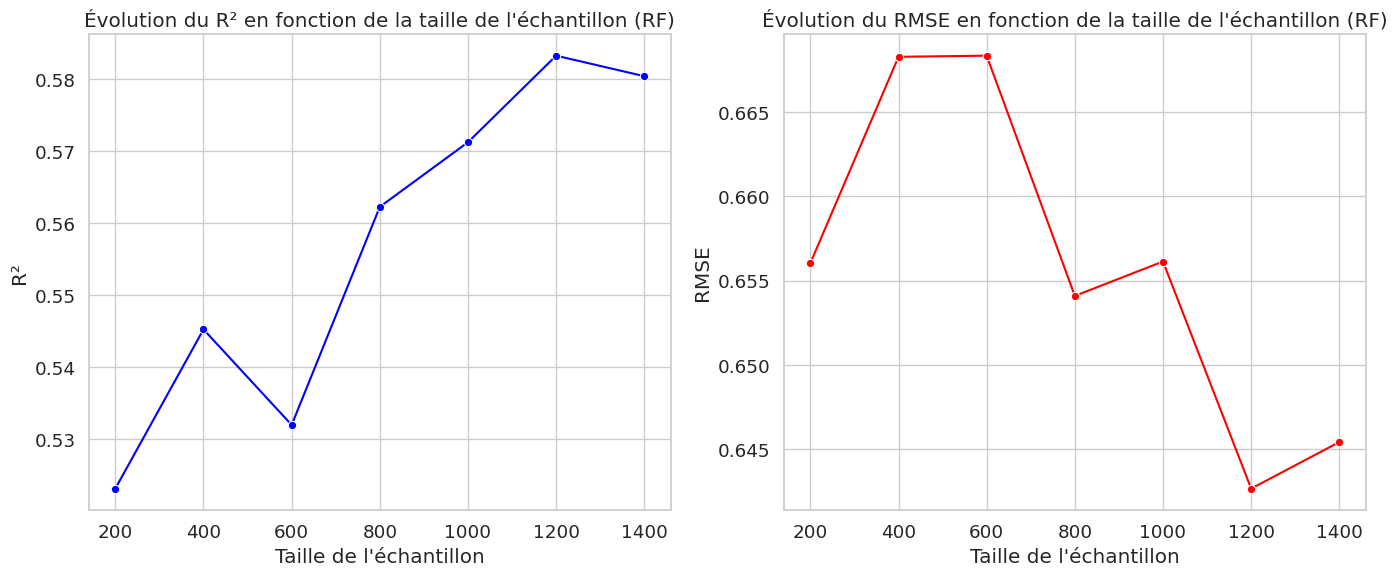

In [ ]:
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Dictionnaire pour enregistrer les résultats
results_rf = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d'échantillon et du nombre de répétitions
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]
n_repeats = 5

# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    r2_scores = []
    rmse_scores = []

    for _ in range(n_repeats):
        # Tirage aléatoire d’un sous-échantillon
        sample_indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[sample_indices]
        y_sample = y.iloc[sample_indices]

        # Validation croisée 5 folds
        kf = KFold(n_splits=5, shuffle=True, random_state=None)

        for train_index, test_index in kf.split(X_sample):
            X_train, X_test = X_sample.iloc[train_index], X_sample.iloc[test_index]
            y_train, y_test = y_sample.iloc[train_index], y_sample.iloc[test_index]

            # Modèle Random Forest
            modelRF = RandomForestRegressor(random_state=42)
            modelRF.fit(X_train, y_train)
            y_pred = modelRF.predict(X_test)

            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            r2_scores.append(r2)
            rmse_scores.append(rmse)

    # Moyenne des scores
    results_rf['sample_size'].append(size)
    results_rf['R2'].append(np.mean(r2_scores))
    results_rf['RMSE'].append(np.mean(rmse_scores))

# Résultats en DataFrame
df_results_rf = pd.DataFrame(results_rf)

# Affichage des résultats
print("Résultats Random Forest Regressor avec 5-fold CV sur 5 sous-échantillons :")
print(df_results_rf)

# Visualisation
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_rf, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon (RF)')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_rf, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon (RF)')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()


**Optimisation des hyperparamètres**

Résultats Random Forest avec GridSearch :
   sample_size        R2      RMSE
0          200  0.314952  0.803874
1          400  0.616109  0.599078
2          600  0.562381  0.626116
3          800  0.590945  0.638188
4         1000  0.549527  0.651153
5         1200  0.439925  0.725394
6         1400  0.544757  0.636381


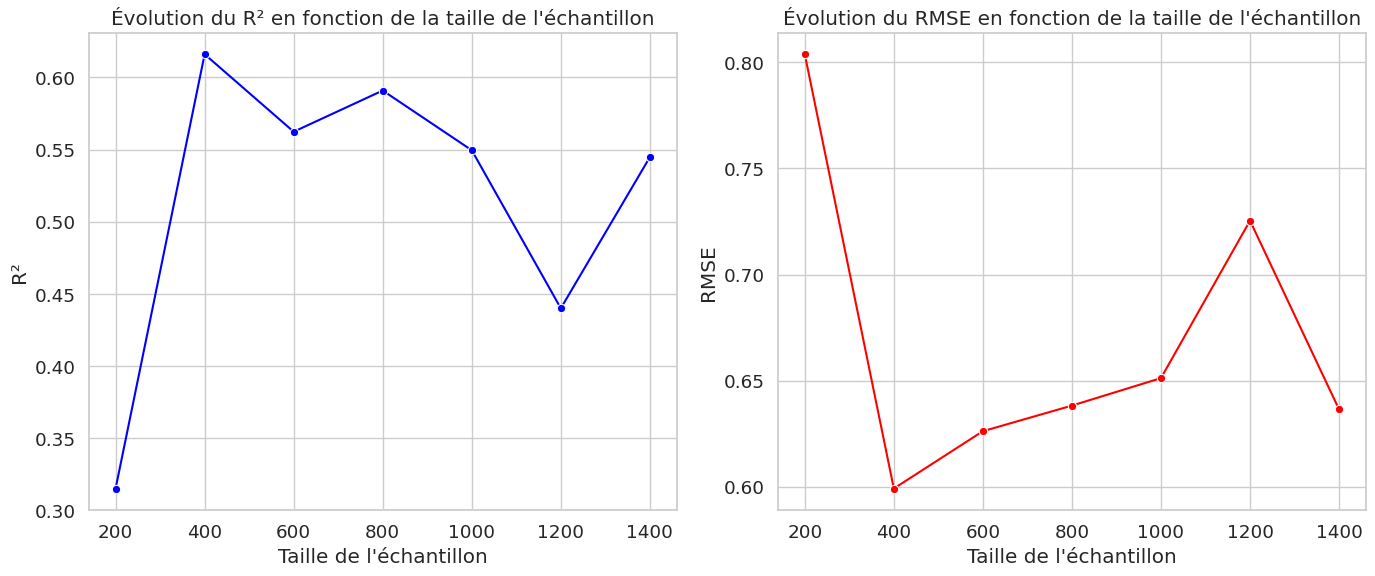

In [ ]:
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

# Dictionnaire pour stocker les résultats
results_rf = {'sample_size': [], 'R2': [], 'RMSE': []}

# Grille d'hyperparamètres Random Forest
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}


# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    sample_indices = np.random.choice(len(X), size=size, replace=False)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]


    # Split train / test
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=42
    )

    # Grid Search avec Random Forest
    grid = GridSearchCV(
        RandomForestRegressor(random_state=42, n_jobs=-1),
        param_grid_rf,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results_rf['sample_size'].append(size)
    results_rf['R2'].append(r2)
    results_rf['RMSE'].append(rmse)

# Convertir les résultats en DataFrame
df_results_rf_GS = pd.DataFrame(results_rf)

# Affichage des résultats
print("Résultats Random Forest avec GridSearch :")
print(df_results_rf_GS)

# Visualisation
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_rf_GS, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_rf_GS, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()

**ARBRE DE DECISION**

Résultats Decision Tree Regressor (moyennes sur 5 rép. x 5 folds) :
   sample_size        R2      RMSE
0          200 -0.034680  0.979659
1          400  0.146554  0.926068
2          600  0.227613  0.878079
3          800  0.210711  0.880224
4         1000  0.240304  0.864317
5         1200  0.210428  0.883191
6         1400  0.228035  0.873769


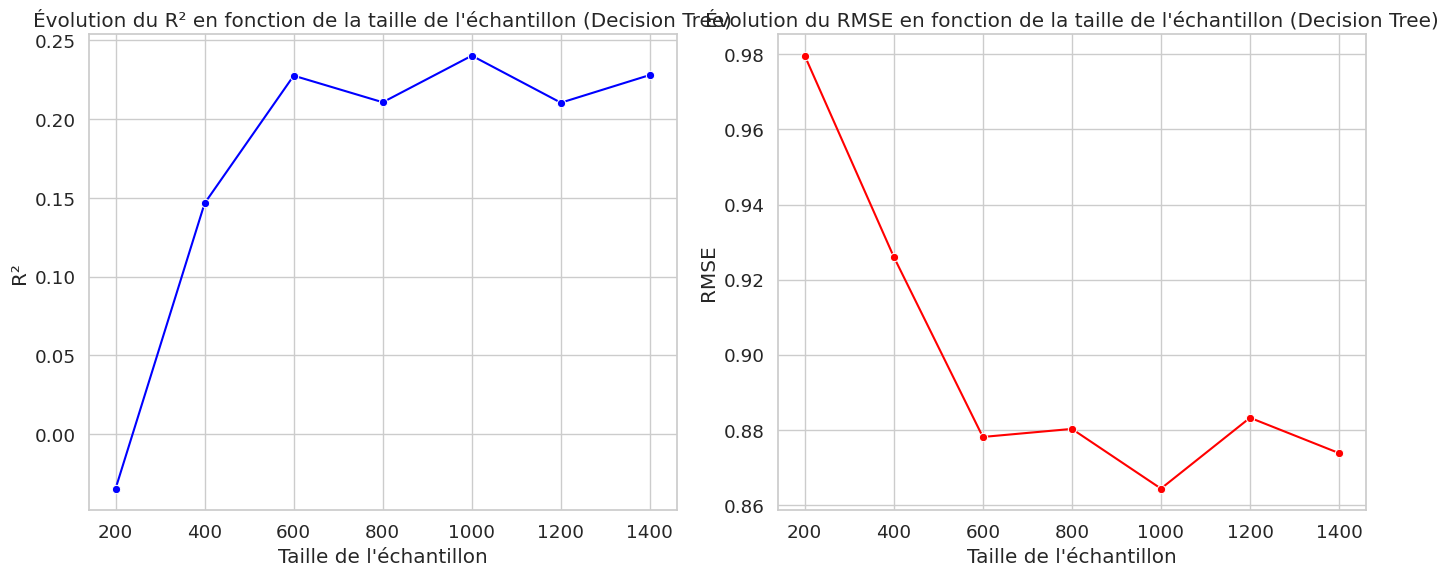

In [ ]:
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Résultats : moyennes uniquement
results_tree = {'sample_size': [], 'R2': [], 'RMSE': []}

# Tailles d’échantillon et nombre de répétitions
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]
n_repeats = 5

# Boucle
for size in sample_sizes:
    r2_scores = []
    rmse_scores = []

    for _ in range(n_repeats):
        sample_indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[sample_indices]
        y_sample = y.iloc[sample_indices]

        kf = KFold(n_splits=5, shuffle=True)

        for train_index, test_index in kf.split(X_sample):
            X_train, X_test = X_sample.iloc[train_index], X_sample.iloc[test_index]
            y_train, y_test = y_sample.iloc[train_index], y_sample.iloc[test_index]

            model_tree = DecisionTreeRegressor(random_state=42)
            model_tree.fit(X_train, y_train)
            y_pred = model_tree.predict(X_test)

            r2_scores.append(r2_score(y_test, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    # Moyennes
    results_tree['sample_size'].append(size)
    results_tree['R2'].append(np.mean(r2_scores))
    results_tree['RMSE'].append(np.mean(rmse_scores))

# DataFrame
df_results_tree = pd.DataFrame(results_tree)

# Affichage
print("Résultats Decision Tree Regressor (moyennes sur 5 rép. x 5 folds) :")
print(df_results_tree)

# Visualisation
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(14, 6))

# R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_tree, x='sample_size', y='R2', marker='o', color='blue')
plt.title("Évolution du R² en fonction de la taille de l'échantillon (Decision Tree)")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("R²")
plt.grid(True)

# RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_tree, x='sample_size', y='RMSE', marker='o', color='red')
plt.title("Évolution du RMSE en fonction de la taille de l'échantillon (Decision Tree)")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("RMSE")
plt.grid(True)

plt.tight_layout()
plt.show()


**Optimisation des hyperparamètres**

Résultats Decision Tree avec GridSearch :
   sample_size        R2      RMSE
0          200  0.025190  1.037858
1          400  0.409943  0.754204
2          600  0.367127  0.764940
3          800  0.493334  0.716748
4         1000  0.517881  0.703282
5         1200  0.508904  0.689040
6         1400  0.507892  0.709934


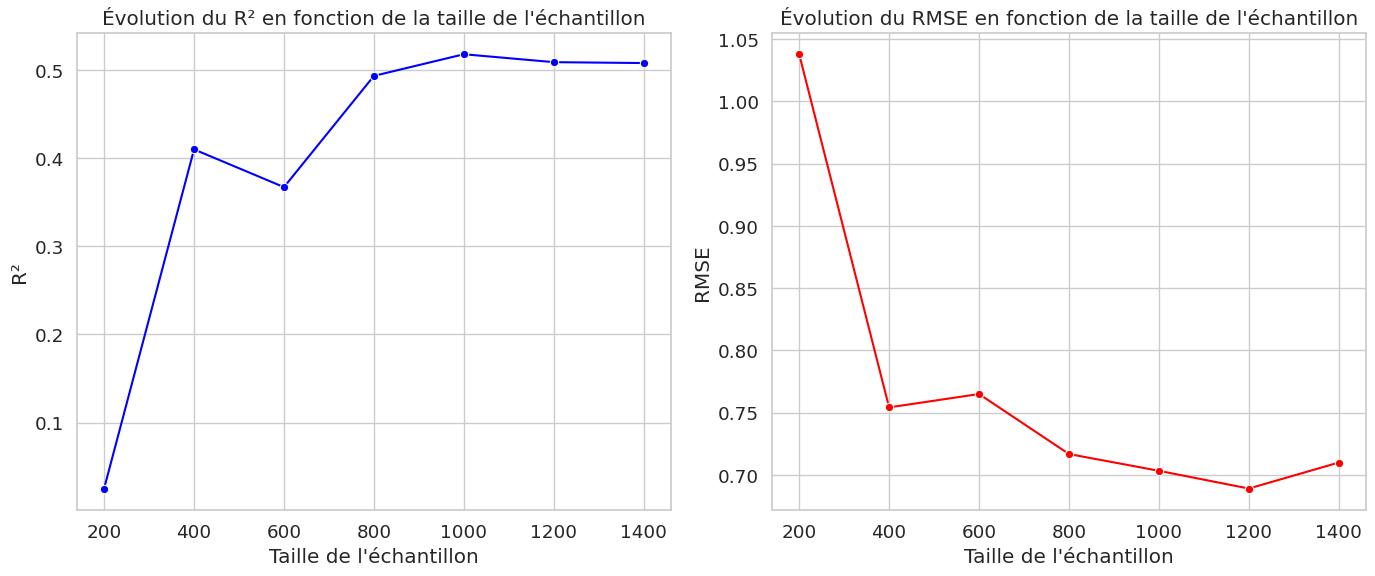

In [ ]:
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Dictionnaire pour enregistrer les résultats
results_dt = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

# Grille d'hyperparamètres pour DecisionTree
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    sample_indices = np.random.choice(len(X), size=size, replace=False)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]


    # Split train / test
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=42
    )

    # Grid Search sur DecisionTree
    grid = GridSearchCV(
        DecisionTreeRegressor(random_state=42),
        param_grid_dt,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results_dt['sample_size'].append(size)
    results_dt['R2'].append(r2)
    results_dt['RMSE'].append(rmse)

# Convertir le dictionnaire en DataFrame
df_results_dt_GS = pd.DataFrame(results_dt)

# Affichage des résultats
print("Résultats Decision Tree avec GridSearch :")
print(df_results_dt_GS)

# Visualisation avec seaborn et matplotlib
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_dt_GS, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_dt_GS, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()


**SUPPORT VECTOR REGRESSION**

Résultats Support Vector Regression avec 5-fold CV sur 5 sous-échantillons :
   sample_size        R2      RMSE
0          200  0.488899  0.694191
1          400  0.507295  0.691774
2          600  0.509566  0.688543
3          800  0.525233  0.688463
4         1000  0.542716  0.675250
5         1200  0.549157  0.667262
6         1400  0.539331  0.675239


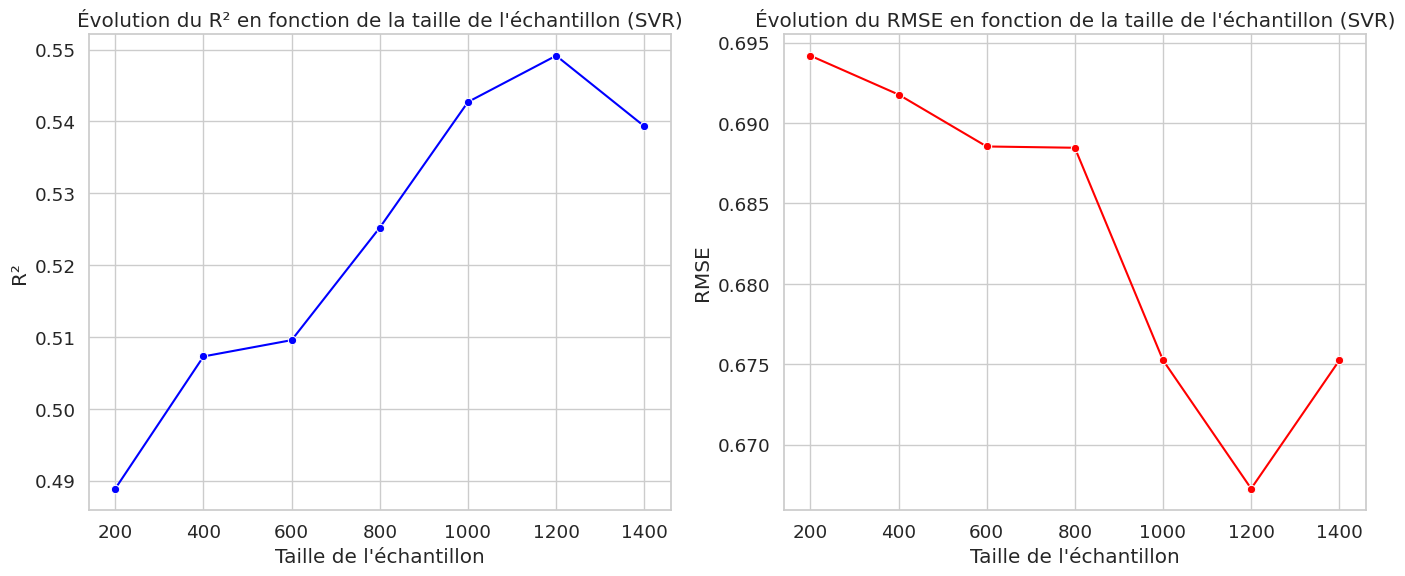

In [ ]:
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Dictionnaire pour enregistrer les résultats
results_svr = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d'échantillon et du nombre de répétitions
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]
n_repeats = 5

# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    r2_scores = []
    rmse_scores = []

    for _ in range(n_repeats):
        # Tirage aléatoire d’un sous-échantillon
        sample_indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[sample_indices]
        y_sample = y.iloc[sample_indices]

        # Validation croisée 5 folds
        kf = KFold(n_splits=5, shuffle=True, random_state=None)

        for train_index, test_index in kf.split(X_sample):
            X_train, X_test = X_sample.iloc[train_index], X_sample.iloc[test_index]
            y_train, y_test = y_sample.iloc[train_index], y_sample.iloc[test_index]

            # Modèle SVR
            modelSVR = SVR(kernel='rbf', C=1.0, epsilon=0.1)
            modelSVR.fit(X_train, y_train)
            y_pred = modelSVR.predict(X_test)

            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            r2_scores.append(r2)
            rmse_scores.append(rmse)

    # Moyenne des scores sur les 5×5 validations
    results_svr['sample_size'].append(size)
    results_svr['R2'].append(np.mean(r2_scores))
    results_svr['RMSE'].append(np.mean(rmse_scores))

# Résultats en DataFrame
df_results_svr = pd.DataFrame(results_svr)

# Affichage des résultats
print("Résultats Support Vector Regression avec 5-fold CV sur 5 sous-échantillons :")
print(df_results_svr)

# Visualisation
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_svr, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon (SVR)')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_svr, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon (SVR)')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()


**Optimisation des hyperparamètres**

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Résultats SVR avec GridSearch :
   sample_size        R2      RMSE
0          200  0.645323  0.598084
1          400  0.495609  0.714233
2          600  0.524480  0.718141
3          800  0.583083  0.655254
4         1000  0.430129  0.719152
5         1200  0.531881  0.669603
6         1400  0.549591  0.637207


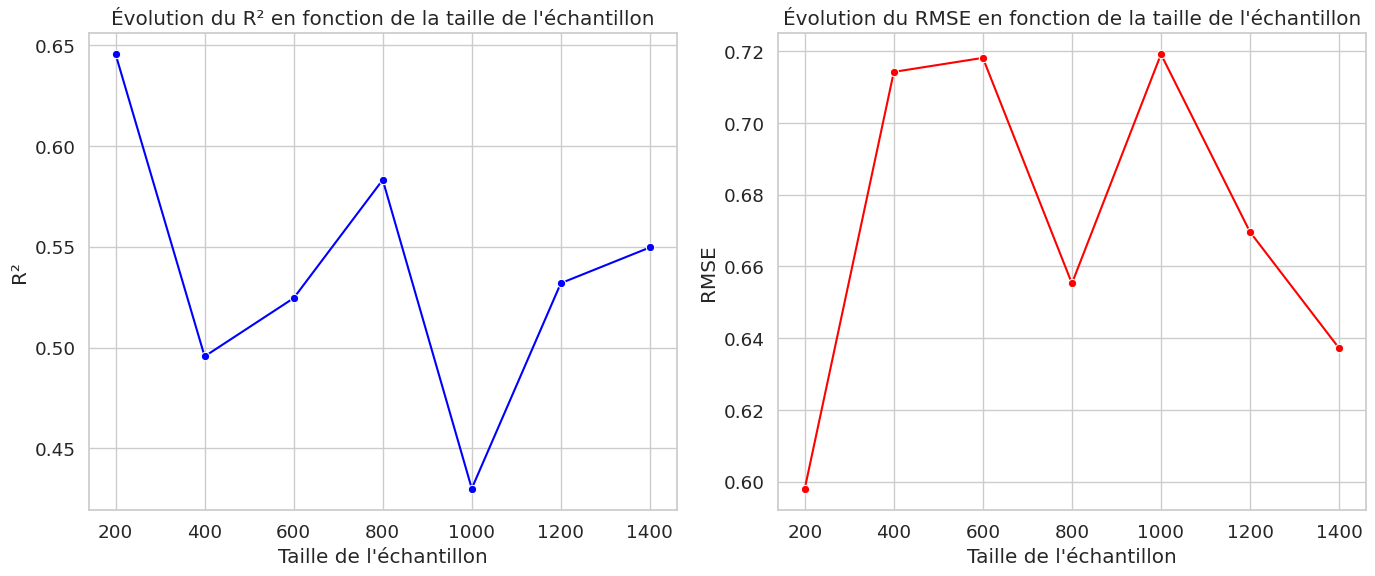

In [ ]:
# X et y sont déjà définis
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Dictionnaire pour stocker les résultats
results_svr = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

# Grille d'hyperparamètres SVR
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    sample_indices = np.random.choice(len(X), size=size, replace=False)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]


    # Séparation en train et test
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=42
    )

    # Grid Search avec SVR
    grid = GridSearchCV(
        SVR(),
        param_grid_svr,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results_svr['sample_size'].append(size)
    results_svr['R2'].append(r2)
    results_svr['RMSE'].append(rmse)

# Convertir les résultats en DataFrame
df_results_svr = pd.DataFrame(results_svr)

# Affichage des résultats
print("Résultats SVR avec GridSearch :")
print(df_results_svr)

# Visualisation avec seaborn et matplotlib
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_svr, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_svr, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()
